In [489]:
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 200
sns.set()

In [490]:
main_df = pd.read_pickle('wnba_total_df.pkl')

In [491]:
main_df.reindex()

,Player,Year,Team,Position,Games_Played,Games_Started,Min_Played,FG,FGA,FG%,...,OWS_Per_Game,DWS_Per_Game,PF_Per_Game,C,C-F,F,F-C,F-G,G,G-F
0,Tajama Abraham,1997,SAC,C,28,5,422,48,126,0.381,...,-0.021429,-0.007143,2.500000,1,0,0,0,0,0,0
1,Marcie Alberts,1997,CLE,G,5,0,30,0,2,0.000,...,-0.020000,0.000000,0.400000,0,0,0,0,0,1,0
2,Monique Ambers,1997,PHO,F,19,0,85,4,9,0.444,...,0.000000,0.005263,0.684211,0,0,1,0,0,0,0
3,Yvette Angel,1997,SAC,G,5,3,90,7,16,0.438,...,-0.020000,0.000000,1.200000,0,0,0,0,0,1,0
4,Janeth Arcain,1997,HOU,G,28,27,784,110,250,0.440,...,0.082143,0.035714,2.000000,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3725,Han Xu,2019,NYL,C,18,0,143,24,58,0.414,...,0.000000,0.000000,0.333333,1,0,0,0,0,0,0
3726,Jackie Young,2019,LVA,G,34,34,767,76,236,0.322,...,0.002941,0.035294,1.382353,0,0,0,0,0,1,0
3727,Tamera Young,2019,LVA,F,34,4,628,68,179,0.380,...,-0.011765,0.029412,1.794118,0,0,1,0,0,0,0
3728,Amanda Zahui B.,2019,NYL,C,24,23,558,81,173,0.468,...,0.025000,0.033333,3.291667,1,0,0,0,0,0,0


In [501]:
X_base = main_df[['DRB%','STL%','BLK%','DWS_Per_Game', 'PF_Per_Game']]
y_base = main_df['Min_Played_Per_Game']
X, y = np.array(X_base), np.array(y_base)

In [502]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.20, random_state=69)

In [497]:
scaler = StandardScaler(with_mean = False)
X_train_val = scaler.fit_transform(X_train_val)

In [458]:
#X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=420)

In [503]:
kf = KFold(n_splits=5, shuffle=True, random_state = 420)
cv_lm_r2s = []

In [504]:
for train_ind, val_ind in kf.split(X_train_val,y_train_val):
    X_train, y_train = X_train_val[train_ind], y_train_val[train_ind]
    X_val, y_val = X_train_val[val_ind], y_train_val[val_ind] 
    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)
    cv_lm_r2s.append(linear_model.score(X_val, y_val))
    #print(list(zip(X_base, linear_model.coef_)))
print('Simple regression scores: ', cv_lm_r2s)
print(f'Simple mean cv r^2: {np.mean(cv_lm_r2s):.3f} +- {np.std(cv_lm_r2s):.3f}')

Simple regression scores:  [0.646940895590544, 0.6180353602074867, 0.6671097856411874, 0.6395653802246875, 0.6583021658546142]
Simple mean cv r^2: 0.646 +- 0.017


In [505]:
linear_model.score(X_test,y_test)

0.6548480907391128

In [438]:
'''for train_ind, val_ind in kf.split(X_train_val,y_train_val):
    X_train, y_train = X_train_val[train_ind], y_train_val[train_ind]
    X_val, y_val = X_train_val[val_ind], y_train_val[val_ind] 
    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)
    cv_lm_r2s.append(linear_model.score(X_val, y_val))
print('Simple regression scores: ', cv_lm_r2s)
print(f'Simple mean cv r^2: {np.mean(cv_lm_r2s):.3f} +- {np.std(cv_lm_r2s):.3f}')''';

In [466]:
list(zip(X_base, linear_model.coef_))

[('Points_Per_Game', 1.6925140430986294),
 ('TS%', -6.106959842052824),
 ('AST%', 0.14651042112861462),
 ('TOV%', -0.0025957442373404217),
 ('ORB%', -0.08467451626900088),
 ('USG%', -0.5853724410353701),
 ('PF_Per_Game', 2.653991950228149)]

In [419]:
list(zip(X_base, linear_model.coef_))

[('PTS', 0.04184851275875108),
 ('TS%', -0.055452254557314715),
 ('AST%', 0.1818258310767478),
 ('TOV%', -0.0419757495935145),
 ('ORB%', -0.025777802909629246),
 ('USG%', -0.3286521526624746),
 ('PF', 0.06744637702836982)]

In [476]:
off_coord_list = [('Points Per Game', 8.398006790835582),
 ('True Shooting %', -0.5773467578219879),
 ('Assist %', 1.1217567256177308),
 ('Turnover %', -0.01936322306886103),
 ('Offensive Rebound %', -0.34597853053644956),
 ('Play Usage %', -2.7755891564098247),
 ('Fouls Per Game', 2.263905440481457)]

def_coord_list =[('Defensive Rebound %', 0.40245721943850316),
 ('Steal %', -0.7450166925025957),
 ('Block %', -2.566810965275535),
 ('Defensive Win Share %', 3.611898134059651),
 ('Fouls Per Game', 5.364469942492107)]

off_labels = []
off_values = []

for label,value in off_coord_list:
        off_labels.append(label)
        off_values.append(value)
        
def_labels = []
def_values = []

for label,value in def_coord_list:
        def_labels.append(label)
        def_values.append(value)

In [441]:
x_labels

['Points_Per_Game',
 'TS%',
 'AST%',
 'TOV%',
 'ORB%',
 'USG%',
 'OWS_Per_Game',
 'PF_Per_Game']

In [442]:
x_values

[10.558315947353936,
 0.03416748241124392,
 1.3542990103875503,
 -0.29619224366507885,
 0.10822198023042216,
 -3.4186432476328834,
 -2.39805910657387,
 1.8026284154744292]

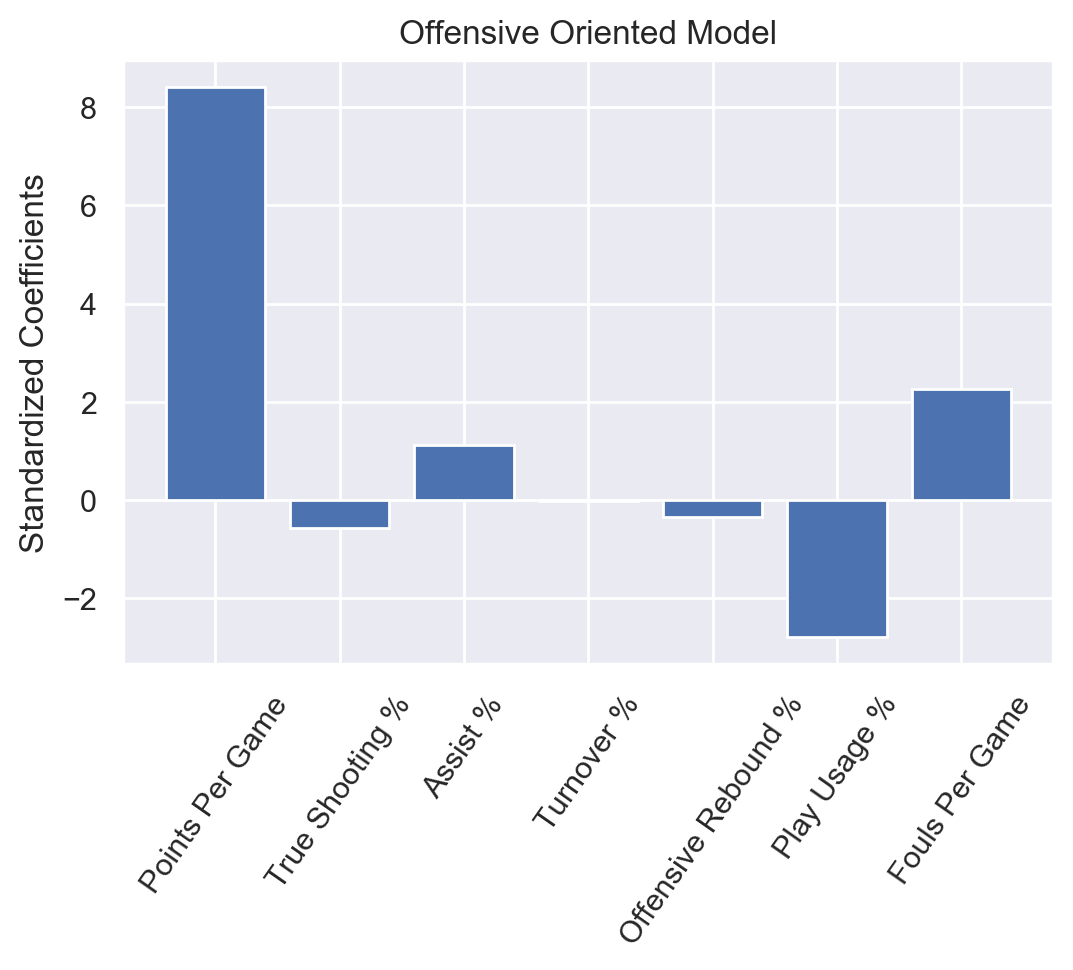

In [487]:
plt.bar(off_labels, off_values)
plt.xticks(rotation=55)
#plt.xlabel('Stats')
plt.ylabel('Standardized Coefficients')
plt.title('Offensive Oriented Model')
plt.savefig("offense.jpg", format="jpg")

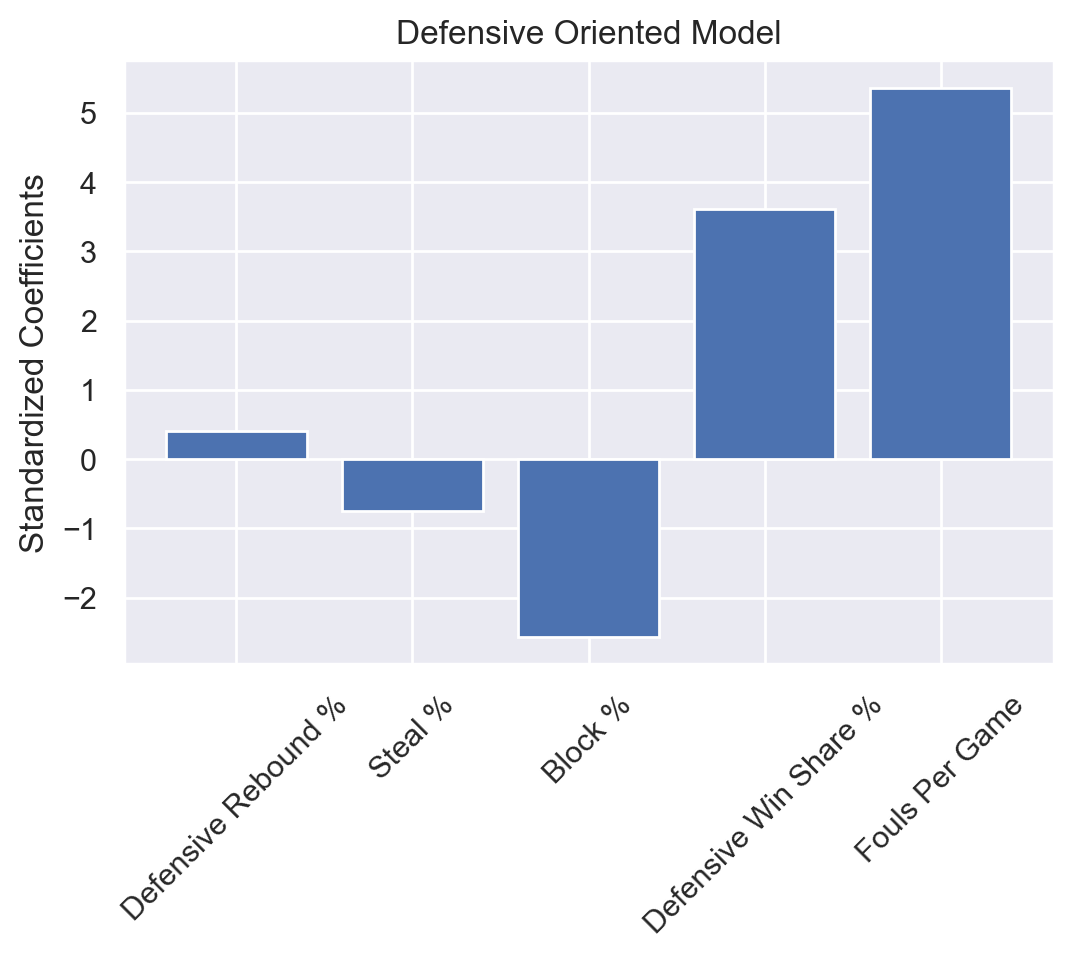

In [488]:
plt.bar(def_labels, def_values)
plt.xticks(rotation=45)
#plt.xlabel('Stats')
plt.ylabel('Standardized Coefficients')
plt.title('Defensive Oriented Model')
plt.savefig("defense.jpg", format="jpg")